## Logistic Sigmoid Regression
- Problem of binary classifier: given dataset $[\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_n] = \mathbf{X} \in \mathbb{R}^{d \times n}$, and a given set of $n$ labels $[y_1, y_2, \dots, y_n] = \mathbf{y} \in \mathbb{R}^{1 \times n}, y_i \in \{0, 1\}$. However dataset $\mathbf{X}, \mathbf{y}$ is given in a way that is not linearly separable between 2 classes, that is there doesn't exist $\mathbf{w}$  such that $\mathbf{w}^T\mathbf{x}_i$ can predict the label $y_i$ of the training data.
- We want to instead, model the probability $\mathbf{x}_i$ belongs to class label $0$ or $1$. Assume exists function $f(\mathbf{x})$ that can model the underlying probability that generate the training data. *Our first goal is to identify what $f$ is*.
- Intuitively, the predicted probability should approach 0 (or 1) as data go further away from disputed region. Assuming smooth curve (differentiable everywhere). If this probability density exists: $$\begin{cases}
  P(y_i = 1|\ \mathbf{x}_i, \mathbf{w}) &= f(\mathbf{w}^T\mathbf{x}_i)\\
  P(y_i = 0|\ \mathbf{x}_i, \mathbf{w}) &= 1 - f(\mathbf{w}^T\mathbf{x}_i)\\
\end{cases}$$
- The Maximum-a-posteriori problem: $$
  \mathbf{w}^* = \underset{\mathbf{w}}{\text{argmax}}\ P(\mathbf{y}|\ \mathbf{X}, \mathbf{w})
$$
- Assume the sampled density is $a_i = f(\mathbf{w}^T\mathbf{x}_i)$ at datapoint $\mathbf{x}_i$, the probability density can be modeled after the Bernoulli trial. Assuming our $a_i$ is modeled after $\lambda$ in Bernoulli's: $$
  P(y_i|\ \mathbf{x}_i, \mathbf{w}) = a_i^{y_i}(1-a_i)^{1-y_i}
$$
- And assume independent observations: $$\begin{aligned}
  P(\mathbf{y}|\ \mathbf{X}, \mathbf{w})
    &= \prod_{i=1}^n P(y_i|\ \mathbf{x}_i, \mathbf{w})\\
    &= \prod_{i=1}^n a_i^{y_i}(1-a_i)^{1-y_i}\\
\end{aligned}$$
- Define loss function to the MAP as the negative log likelihood, to be minimised: $$\begin{aligned}
  J(\mathbf{w})
    &= -\ln P(\mathbf{y}|\ \mathbf{X}, \mathbf{w})\\
    &= -\ln \prod_{i=1}^n a_i^{y_i}(1-a_i)^{1-y_i}\\
    &= -\sum_{i=1}^n \left[y_i\ln(a_i) + (1-y_i)\ln(1-a_i)\right]\\
\end{aligned}$$
- The goal is to use stochastic gradient descent to minimise $J$. Assess $J_i$ as follow: $$
  J_i(\mathbf{w}) = J_i(\mathbf{w}; y_i, \mathbf{x}_i) = -\left(y_i\ln(a_i) + (1-y_i)\ln(1-a_i)\right)
$$
- We want to identify what function $f$ is model the probability that satisfies the logistic condition, and at the same time makes SGD easier. First take derivative w.r.t. $\mathbf{w}$: $$\begin{aligned}
  \frac{\partial J_i}{\partial \mathbf{w}}
    &= \frac{\partial J_i}{\partial a_i} \frac{\partial a_i}{\partial \mathbf{w}} \ \ \ \ \text{(chain rule)}\\
    &= -\left( \frac{y_i}{a_i} - \frac{1-y_i}{1-a_i} \right) \frac{\partial a_i}{\partial \mathbf{w}}\\
    &= \frac{a_i - y_i}{a_i(1-a_i)} \frac{\partial a_i}{\partial \mathbf{w}} \ \ (1)
\end{aligned}$$
- Set $z = \mathbf{w}^T\mathbf{x} \Rightarrow \frac{\partial z}{\partial \mathbf{w}} = \mathbf{x}$, we have $a = f(z)$ and: $$
  \frac{\partial a_i}{\partial \mathbf{w}} = \frac{\partial a_i}{\partial z_i} \frac{\partial z_i}{\partial \mathbf{w}} = \frac{\partial a_i}{\partial z_i} \mathbf{x} \ \ (2)
$$
- Therefore, from $(1),\ (2)$: $$
  \frac{\partial J_i}{\partial \mathbf{w}} = \frac{a_i - y_i}{a_i(1-a_i)} \frac{\partial a_i}{\partial z_i} \mathbf{x}_i \ \ (3)
$$
- To simplify SGD, we find $a = f(z)$ to cancel out denominator $a_i(1-a_i)$, or to solve differential equation $\frac{\partial a}{\partial z} = a(1-a)$: $$\begin{aligned}
&\qquad&
  \frac{\partial a}{\partial z} &= a(1-a)\\
\iff&& \frac{\partial a}{a(1-a)} &= \partial z\\
\iff&& \partial a\left(\frac{1}{a} + \frac{1}{1-a}\right) &= \partial z\\
\iff&& \int \partial a \frac{1}{a} + \int \partial a \frac{1}{1-a} &= \int \partial z \ \ \ \ (\mathrm{d}\mathbf{w})\\
\iff&& \ln(a) - \ln(1-a) &= z\\
\iff&& \ln\left(\frac{a}{1-a}\right) &= z\\
\iff&& \frac{a}{1-a} &= \exp(z)\\
\iff&& a &= \exp(z) - a\exp(z)\\
\iff&& a + a\exp(z) &= \exp(z)\\
\iff&& a &= \frac{\exp(z)}{1+\exp(z)} = \frac{1}{1+\exp({-z})}\\
\end{aligned}$$
- This is also known as the sigmoidal function $\sigma{(z)} = \frac{1}{1+\exp({-z})}$. Substitute back to $(3)$: $$
  \frac{\partial J_i}{\partial \mathbf{w}} = (a_i - y_i)\mathbf{x}_i
$$
- And SGD update will follow: $$
  \mathbf{w}^{(t)} = \mathbf{w}^{(t-1)} + \eta (a_i - y_i)\mathbf{x}_i
$$

[[-4.10799374]
 [ 1.54354223]]


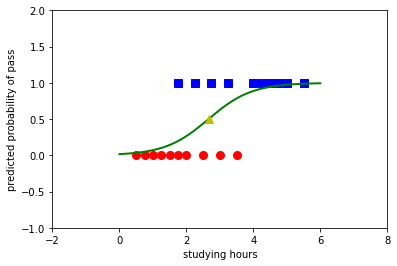

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from regression.LogisticSigmoidRegression import LogisticSigmoidRegression

np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
            2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

LSR = LogisticSigmoidRegression(X, y)
w = LSR.fit(w_init, eta)
print(w[-1])

X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = LSR.sigmoid(w0 + w1*xx)

plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')

plt.show()

## Logistic Regression with IRLS
- Weighted least square is a special case of Generalized Linear Model. WLS modeled using canonical form, and minimized with iteralively-reweighted least square is another approach to solve logistic regression.
- Starting with a random variable $\mathbf{y}$ drawn from a Bernoulli distribution with probabiliy $p$ : $mathbf{y} \sim \text{Ber}(p)$. The pmf is given by:
$$
    f_p(y_i) = p^{y_i}(1-p)^{1-y_i}
$$
- In exponential form:
$$
\begin{aligned}
    f_p(y_i)
        &= p^{y_i}(1-p)^{1-y_i} \\
        &= \exp\left(y_i\ln{(p)} + (1-y_i)\ln{(1-p)}\right) \\
        &= \exp\left(y_i\ln{\frac{p}{1-p}} + \ln{(1-p)}\right) \\
\end{aligned}
$$
- Bring to exponential family of distribution using change of variables $\theta = \ln{\frac{p}{1-p}} \Rightarrow \ln{(1-p)} = \ln{\frac{1}{1+e^{\theta}}} = -\ln{(1+e^{\theta})}$:
$$
    f_{\theta}(y_i) = \exp{(y_i\theta - \ln{(1+e^{\theta}))}}
$$
- Which belongs to the exponential family of distribution $f_{\theta}(y_i) = \exp{\left(\frac{y_i\theta - \text{b}(\theta)}{\phi} + \text{c}(y_i, \phi)\right)}$ with $\text{b}(\theta) = \ln{(1+e^{\theta})}$ $\phi = 1$ and $\text{c}(\cdot) = 0$.
- We have:
$$
\begin{cases}
    \text{b}'(\theta) = \frac{e^{\theta}}{1+e^{\theta}} = p = \mu(\mathbf{x}) \\
    (\text{b}')^{-1}(p) = \ln{\frac{p}{1-p}} = \theta
\end{cases}
$$
- To linearize relationship between $y_i$ and $\mathbf{x}$ with link function $\text{g}(\mu(\mathbf{x})) = \beta^{T}\mathbf{x} \Rightarrow \mu(\mathbf{x}) = \text{g}^{-1}(\beta^T\mathbf{x})$:
$$
\begin{aligned}
    \theta(\mathbf{x})
        &=(\text{b}')^{-1}(\mu(\mathbf{x})) \\
        &= (\text{b}')^{-1}(\text{g}^{-1}(\beta^T\mathbf{x})) \\
        &= (\text{g} \ \circ \ \text{b}')^{-1}(\beta^T\mathbf{x})) \triangleq \text{h}(\beta^T\mathbf{x})
\end{aligned}
$$
- Under the canonical link, we can choose $\text{h}$ to be the identify, therefore:
$$
    \theta = \beta^T\mathbf{x} = \ln{\frac{p}{1-p}} \\
    \Rightarrow
    \begin{cases}
        p = \frac{e^{\beta^T\mathbf{x}}}{1+e^{\beta^T\mathbf{x}}}\\
        1-p = \frac{1}{1+e^{\beta^T\mathbf{x}}}
    \end{cases}
$$
- The likelihood and negative log-likelihood are given as follow:
$$
\mathbf{L}(\beta) =\prod_{i} \exp{\left(y_i\ln{(p)} + (1-y_i)\ln{(1-p)}\right)} \\
\begin{aligned}
    \Rightarrow \text{nll}_{\beta}(\mathbf{L})
        &= - \sum_{i}y_i \ln{(p)} + (1-y_i)\ln{(1-p)}\\
        &= - \sum_{i}y_i\beta^T\mathbf{x}_i -\ln{\left(1+e^{\beta^T\mathbf{x}_i}\right)}
\end{aligned}
$$
- From here, with the minimization approach using Newton-Raphson methods, first we calculate the gradient and Hessian:
$$
\begin{aligned}
\nabla_{\text{nll}}(\beta)
&= - \sum_i y_i \mathbf{x}_i - \frac{e^{\beta^T\mathbf{x}_i}}{1+e^{\beta^T\mathbf{x}_i}}\mathbf{x}_i\\
&= \sum_i \left(\frac{e^{\beta^T\mathbf{x}_i}}{1+e^{\beta^T\mathbf{x}_i}}-y_i\right)\mathbf{x}_i\\
\mathbf{H}_{\text{nll}}(\beta) &= \sum_i \frac{e^{\beta^T\mathbf{x}_i}}{\left(1+e^{\beta^T\mathbf{x}_i}\right)^2}\mathbf{x}_i\mathbf{x}_i^T
\end{aligned}
$$
- Since $p_i = \frac{e^{\beta^T\mathbf{x}_i}}{1+e^{\beta^T\mathbf{x}_i}} \Rightarrow 1-p_i = \frac{1}{1+e^{\beta^T\mathbf{x}_i}}$, we can rewrite:
$$
\begin{cases}
    \nabla_{\text{nll}}(\beta) &= \sum_i (p_i - y_i)\mathbf{x}_i = \mathbf{X}^T(\mathbf{p}-\mathbf{y})\\
    \mathbf{H}_{\text{nll}}(\beta) &= \sum_i \left(p_i(1-p_i)\mathbf{x}_i\mathbf{x}_i^T\right)
\end{cases}
$$
- This is where the weighted least square comes in. In a generalized linear model, the weight is defined as $w_i \triangleq \frac{\text{h}'(\beta^T\mathbf{x}_i)}{\text{g}'(\mu_i)\phi}$. In logistic regression under canonical link case, $w_i = p_i(1-p_i)$, and we have "weighted" mean and variable, denote as $\widetilde{\mathbf{p}}$ and $\widetilde{\mathbf{y}}$, where $\widetilde{p}_i = \frac{1}{w_i}p_i$ and $\widetilde{y}_i = \frac{1}{w_i}y_i$ respectively. Form matrix $\mathbf{W} = \text{diag}(w_1, \dots, w_n)$, we have the weighted least square form of the minimization problem:
$$
\begin{cases}
    \nabla_{\text{nll}}(\beta) &= \mathbf{X}^T(\mathbf{p}-\mathbf{y}) = \mathbf{X}^T\mathbf{W}(\widetilde{\mathbf{p}}-\widetilde{\mathbf{y}})\\
    \mathbf{H}_{\text{nll}}(\beta) &= \sum_i w_i\mathbf{x}_i\mathbf{x}_i^T = \mathbf{X}^T\mathbf{W}\mathbf{X}
\end{cases}
$$
- Using Newton-Raphson update (convex analysis is left out of this notebook, this update is proven to converge):
$$
\begin{aligned}
    \beta^{(k+1)}
    &= \beta^{(k)} - (\mathbf{H}_{\text{nll}}^{-1})^{(k)}(\beta)\nabla^{(k)}_{\text{nll}}(\beta)\\
    &= \left(\mathbf{X}^T\mathbf{W}\mathbf{X}\right)^{-1}\left(\mathbf{X}^T\mathbf{W}\mathbf{X}\right)\beta^{(k)}-\left(\mathbf{X}^T\mathbf{W}\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{W}(\widetilde{\mathbf{p}}-\widetilde{\mathbf{y}})\\
    &= \left(\mathbf{X}^T\mathbf{W}\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{W}\left(\mathbf{X}\beta^{(k)}-\widetilde{\mathbf{p}}+\widetilde{\mathbf{y}}\right)
\end{aligned}
$$
- This is the iteratively reweighted least square, which is proven to converge to a unique extremum. The vector $\mathbf{z} = \left(\mathbf{X}\beta^{(k)}-\widetilde{\mathbf{p}}+\widetilde{\mathbf{y}}\right)$ is called vector of working responses.


summary:

Growth ~ pH + Nisin + Temp + Brix

Coefficient     Estimate       
--------------- ---------------
<Intercept>     1.083410040328644
Nisin           0.05290620908045392
Temp            -0.42545674672730066
pH              -0.05427948036649771

IRLS Converged in 7 iterations.

summary:

Growth ~ pH + Nisin + Temp + Brix

Coefficient     Estimate       
--------------- ---------------
<Intercept>     1.083410040328644
Nisin           0.05290620908045392
Temp            -0.42545674672730066
pH              -0.05427948036649771

IRLS Converged in 7 iterations.

summary:

Growth ~ pH + Nisin + Temp + Brix

Coefficient     Estimate       
--------------- ---------------
<Intercept>     1.083410040328644
Nisin           0.05290620908045392
Temp            -0.42545674672730066
pH              -0.05427948036649771

IRLS Converged in 7 iterations.


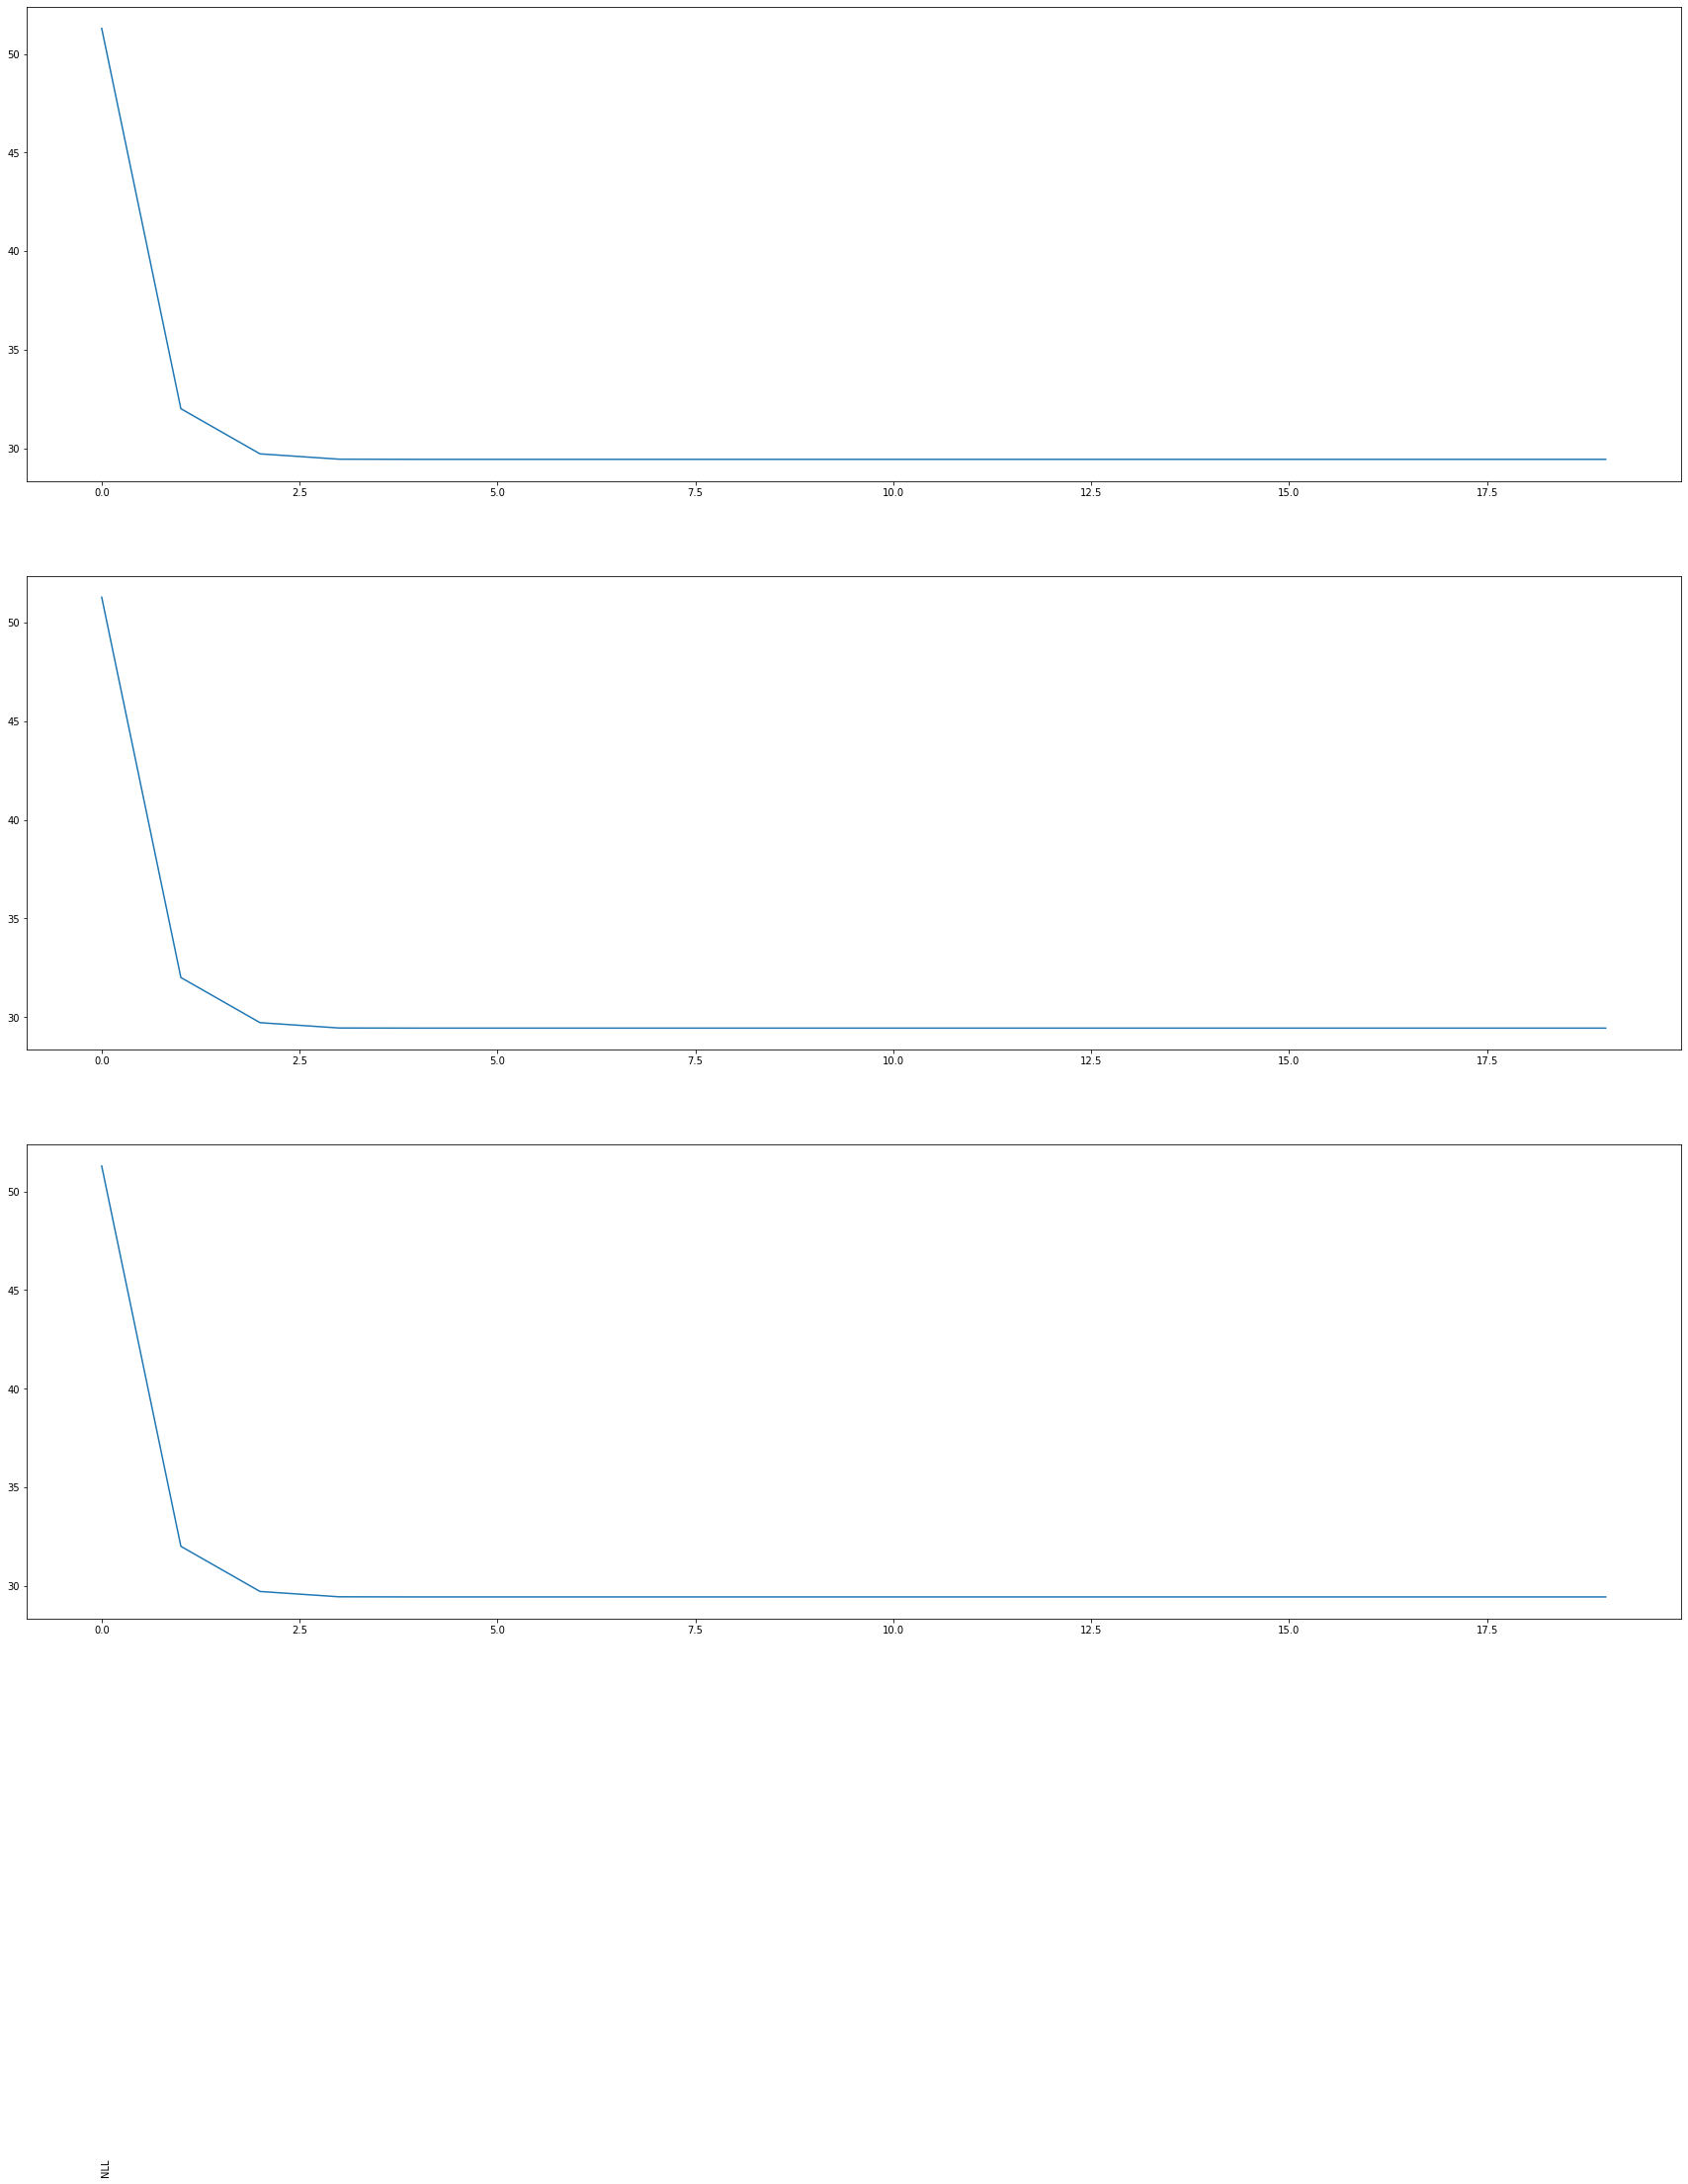

In [5]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

from regression.LogisticModelIRLS import LogisticModelIRLS

data_urls = [
    "https://raw.githubusercontent.com/WillFleming/logistic-regression/master/datasets/fieldgoals.csv",
    "https://raw.githubusercontent.com/WillFleming/logistic-regression/master/datasets/juice.csv",
    "https://raw.githubusercontent.com/WillFleming/logistic-regression/master/datasets/gold.csv",
]


fig = plt.figure(figsize=(30, 30))

for i, url in enumerate(data_urls):
    ax = fig.add_subplot(3, 1, i+1)
    
    url = data_urls[1]
    df = pd.read_csv(url)
    data = df.to_numpy()
    varnames = list(df.columns.values)
    y = df.iloc[:, 0].to_numpy()
    X = df.iloc[:, 1:].to_numpy()

    model = LogisticModelIRLS(X, y, varnames)
    model.fit(iters=20)
    model.info()

    ax.text(.05, 0.5, 'NLL', ha='center', va='center', rotation='vertical')

    ax.plot(model.nll_seq)